# Iris Dataset

We take the  **[Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)** as example. This had already been introduced by famous statistician
Ronald Fisher in 1936 and is used since then as instructive use case for classification. 
The data consists of
* measurements of length and width of both sepal (Bl&uuml;tenkelch) and petal (Bl&uuml;te) 
* classification of Iris sub-species



In [1]:
# the usual setup: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# seaboorn provides easy way to import iris dataset as pandas dataframe
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data visualization
First step should always be some investigation of data properties, i.e.
* basic statistical properties
* visualization of distributions


In [3]:
# supress nasty warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
# basic statistics with pandas
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='sepal_length', ylabel='Count'>

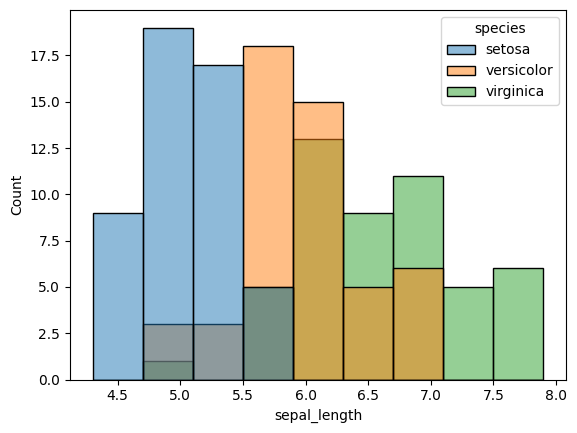

In [5]:
# distribution of single feature
sns.histplot(data=iris,x='sepal_length',hue='species')

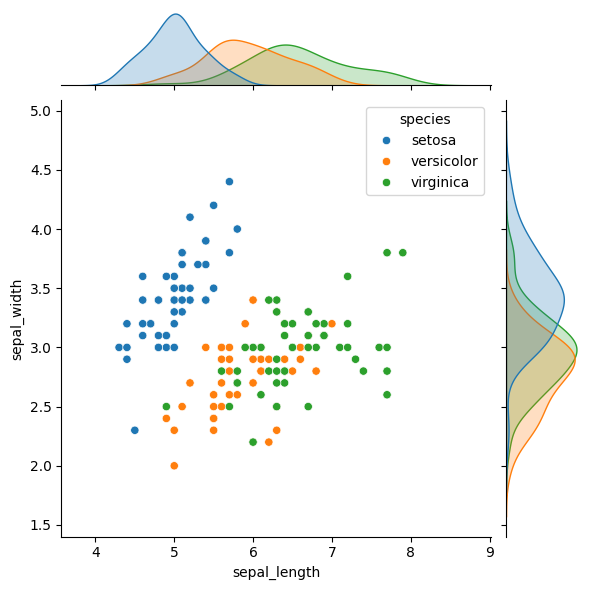

In [6]:
# combined plot of 2 features
sns.jointplot(data=iris,x='sepal_length',y='sepal_width', hue='species')

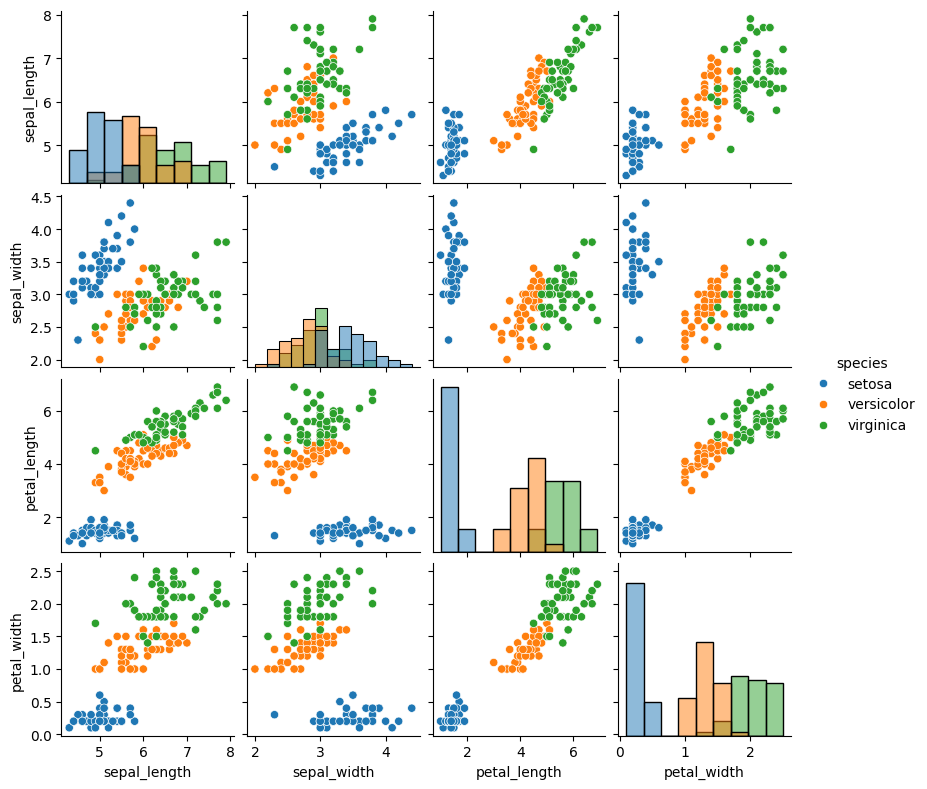

In [7]:
# combined plot matrix of all features in dataframe
#
# will provide scatter plot of all combinations of numerical columns in dataframe
# target (=species) can be given and will cause different colors
sns.pairplot(iris, hue='species', diag_kind='hist', height=2.0)

***

## Dimensionality Reduction 
The Iris data is also a good show case  **dimensionality reduction**, i.e. check if there is a lower dimensional representation which retains the essential features.
* In case of Iris data there are four feature dimensions
* scatter plot showed clear correlations between features
  * indication that less dimensions might be sufficient
  
One standard method is principal component analysis (PCA), which can be applied in case of (reasonably) linear correlations.

As before we have to do the usual scikit steps:
* Setup PCA model 
* fit/train
* get reduced dimensions as output of transform

In [36]:
# read in again iris dataset and store feature matrix
import seaborn as sns
iris = sns.load_dataset('iris')
# feature matrix
X=iris.loc[:,'sepal_length':'petal_width']
X.shape

(150, 4)

**Optional scaling**

Next codebox does scaling of features to common mean and spread, this can be important for PCA.


In [37]:
Xn = X
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
# uncomment next line to get effect
#Xn = scaler.transform(X)

StandardScaler()

**Setup and fit model**

In [38]:
from sklearn.decomposition import PCA  # 1. Choose the model class
#model = PCA(n_components=2)            # 2. Instantiate the model, fix to 2 parameters
model = PCA()                         # 2. Instantiate -- don't restrict # params
#model = PCA(n_components=0.9)         # 2. Instantiate -- n-parameters until 90% of variance isreached 
model.fit(Xn)                           # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(Xn)              # 4. Transform the data to two dimensions
X_2D.shape

(150, 4)

**Visualize transformed data:**

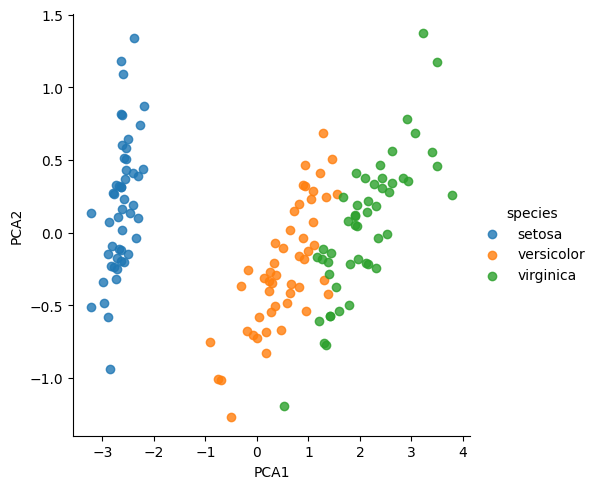

In [39]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

We can display the coefficients of the PCA transformation using the `model.components_` property:

In [40]:
model.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

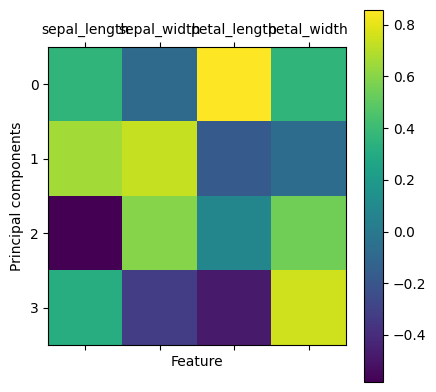

In [41]:
plt.matshow(model.components_)
plt.colorbar()
plt.xticks(range(len(X.columns)), X.columns)
plt.xlabel("Feature")
plt.ylabel("Principal components");

Or we plot the correlation like we did before:

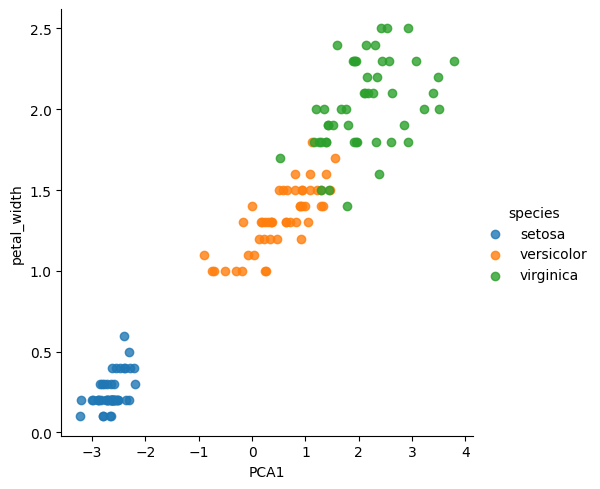

In [42]:
sns.lmplot(x="PCA1", y="petal_width", hue='species', data=iris, fit_reg=False);

**Model provides information on covered variance per par**

Text(0.5, 1.0, 'PCA explained variance')

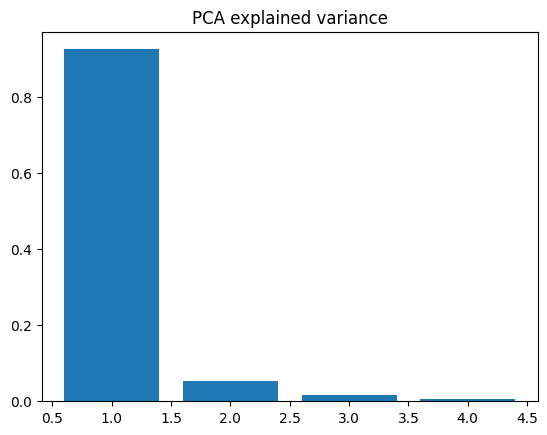

In [43]:
plt.bar(np.arange(len(model.explained_variance_ratio_))+1,model.explained_variance_ratio_)
plt.title('PCA explained variance')

In [44]:
model.explained_variance_ratio_*100,np.cumsum(model.explained_variance_ratio_*100)

(array([92.46187232,  5.30664831,  1.71026098,  0.52121839]),
 array([ 92.46187232,  97.76852063,  99.47878161, 100.        ]))

### Exercises
* Redo PCA
  * no constraint on n_components --> 4 pars
  * n_components = 0.95 --> model uses as many componentes as needed to obtain 95% variance coverage
  * repeat with scaled X features
  *
  
* Do some basic classification (eg kNN, logistic regression) using the 2 PCA Iris components and compare with the original kNN using all 4 Iris features

## Clustering

Of course we can also try our clustering methods on the Iris dataset.


### k-Means model
A very simple model is ...

### Gaussian mixture model
One powerful method is Gaussian mixture model (GMM) *(Details see Data Science Handbook: 05.12-Gaussian-Mixtures.ipynb)*  
A GMM attempts to model the data as a collection of Gaussian blobs.

We can fit the Gaussian mixture model as follows:

In [45]:
from sklearn.mixture import GaussianMixture       # 1. Choose the model class
#
model =  GaussianMixture(n_components=3,
                         covariance_type='full')  # 2. Instantiate the model with hyperparameters

model.fit(X)                                      # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X)                          # 4. Determine cluster labels
#model.fit(X_scaled)                                      # 3. Fit to data. Notice y is not specified!
#y_gmm = model.predict(X_scaled)                          # 4. Determine cluster labels

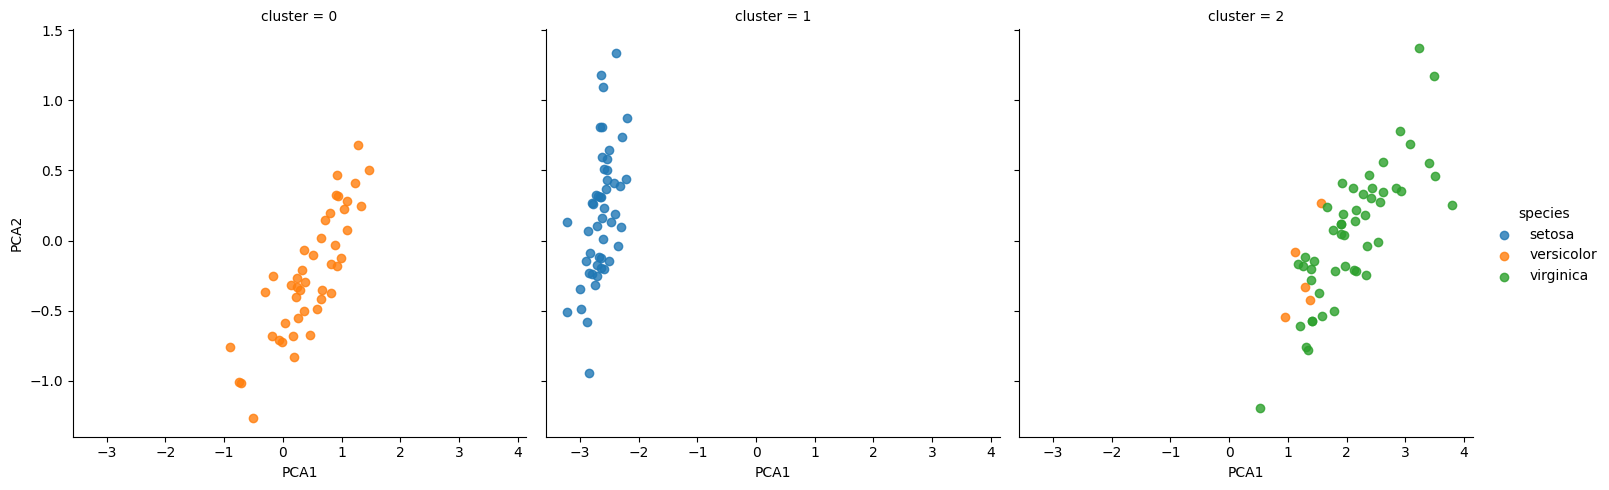

In [46]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

##### Plot PCA data for each identified cluster  
Indicates good clustering, basically identical to species.


***
# PCA applied to digit data

Another classic example case for ML is handwritten digits data.

A suitable dataset is included with sklearn, first we look into it:


In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [18]:
type(digits)

sklearn.utils._bunch.Bunch

In [19]:
digits?

Type:        Bunch
String form:
{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
           [ 0.,  0.,  0., ..., 10.,  0.,  0.],
           <...> e. A New Approximate Maximal Margin Classification\n  Algorithm. NIPS. 2000.\n\n|details-end|\n"}
Length:      7
File:        c:\users\maxge\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages\sklearn\utils\_bunch.py
Docstring:  
Container object exposing keys as attributes.

Bunch objects are sometimes used as an output for functions and methods.
They extend dictionaries by enabling values to be accessed by key,
`bunch["value_key"]`, or by an attribute, `bunch.value_key`.

Examples
--------
>>> from sklearn.utils import Bunch
>>> b = Bunch(a=1, b=2)
>>> b['b']
2
>>> b.b
2
>>> b.a = 3
>>> b['a']
3
>>> b.c = 6
>>> b['c']
6

In [20]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

The data is sklearn specific container, basically a list of 8x8 pixels images

We plot a sub-set:

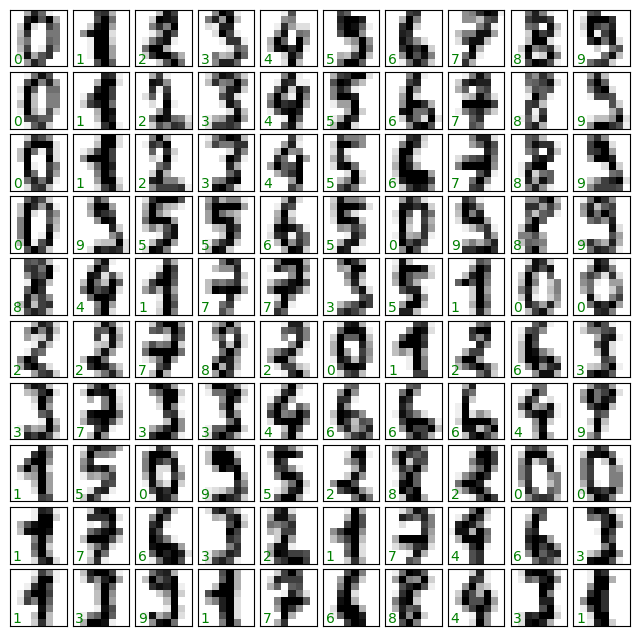

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Plot shows pixel image together with label (in green).

* Some images are obvious
* Others seem difficult 

In [22]:
# Look at data from 1st image --> 2D table resembles 0
print (digits.images[1])

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


In [23]:
digits.images[0].shape

(8, 8)

## Image data with sklearn:
To use the data with sklearn as before we need a 2D structure: `samples x features` , i.e. the 8x8 images should be transformed into flat 1x64 array.   

Already provided in Dataset, element `data` :

In [24]:
print (digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [25]:
# to use as before just re-label
X = digits.data
y = digits.target

### PCA

In [26]:
# first try PCA
from sklearn.decomposition import PCA  # 1. Choose the model class
#model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters -- 2 pars
model = PCA(n_components=0.9)         # 2. Instantiate the model with hyperparameters -- # pars up to 90% coverage
model.fit(X)                           # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X)              # 4. Transform the data to two dimensions



**Check covered variance**

In [27]:
model.explained_variance_ratio_*100

array([14.89059358, 13.61877124, 11.79459376,  8.40997942,  5.78241466,
        4.91691032,  4.31598701,  3.66137258,  3.3532481 ,  3.07880621,
        2.37234084,  2.27269657,  1.82186331,  1.77385494,  1.46710109,
        1.4097156 ,  1.3185892 ,  1.24813782,  1.01771796,  0.90561744,
        0.88953846])

In [28]:
np.cumsum(model.explained_variance_ratio_*100)

array([14.89059358, 28.50936482, 40.30395859, 48.71393801, 54.49635267,
       59.41326299, 63.72925   , 67.39062258, 70.74387068, 73.82267688,
       76.19501773, 78.4677143 , 80.28957761, 82.06343255, 83.53053364,
       84.94024924, 86.25883844, 87.50697626, 88.52469422, 89.43031166,
       90.31985012])

Text(0.5, 1.0, 'PCA explained variance')

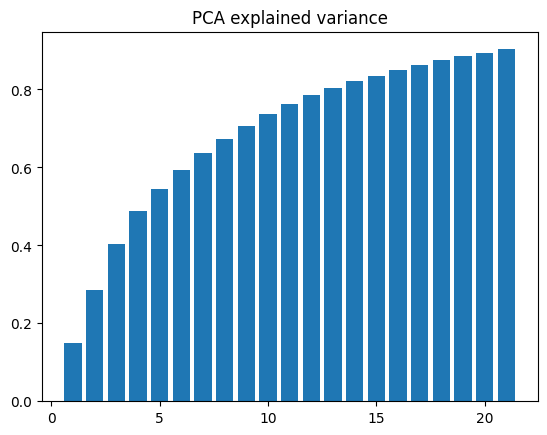

In [29]:
#plt.bar(np.arange(len(model.explained_variance_ratio_))+1,model.explained_variance_ratio_)
plt.bar(np.arange(len(model.explained_variance_ratio_))+1,np.cumsum(model.explained_variance_ratio_))
plt.title('PCA explained variance')

---

**now reduce 64 to 2 dimensions and visualize it**

In [30]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters -- 2 pars
model.fit(X)                           # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X)              # 4. Transform the data to two dimensions

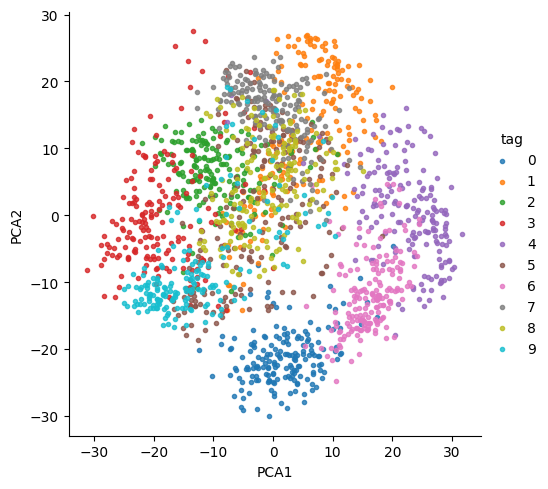

In [31]:
xout=pd.DataFrame()
xout['tag']=y
xout['PCA1'] = X_2D[:, 0]
xout['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='tag', data=xout, fit_reg=False, markers='.');


Some digits are nicely isolated, others less so

Think about it, which digits tend to look similar?

We can also have a look at the *principle components* that the PCA has extracted from the digits dataset:

In [32]:
model.components_.shape

(2, 64)

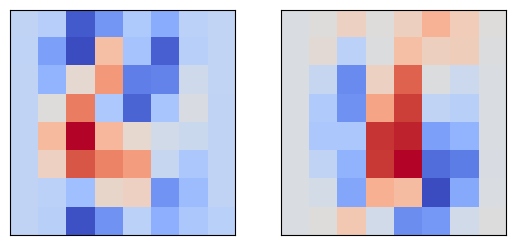

In [33]:
# plot PCA components of digits
fig, ax = plt.subplots(1, 2, subplot_kw={'xticks': (), 'yticks': ()})
for idx, comp in enumerate(model.components_[:2]):
    img = comp.reshape(8,8)
    ax.ravel()[idx].imshow(img, cmap="coolwarm")

The left image shows the most important, the right image the second-most important component extracted by the PCA.
Compare this to the previous plot to see that this actually makes sense: 
* If you focus on the blue ("negative") pixels in the left image, those resemble the digit "3". Indeed, from the previous plot we see that the figures 3 cluster at low values of PCA1 (and around 0 for PCA2, i.e. they typically have not much of the second component in the right image). 
* The red in the left image could be part of a "4" which indeed has high values for PCA1.
* Similarly, the red in the right image is somewhat the outline of a "0" which has large positive values for PCA2 (and small absolute values for PCA1).

Can you find the digit "1"?